In [2]:
#-----------------2.1-----------GMM Class-------------------------------
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
np.set_printoptions(threshold=np.inf)

np.random.seed(42)

class MyGMM:
    def __init__(self):
        self.weights = None
        self.means = None
        self.covariances = None

    def fit(self, data, n_components, max_iterations=1000, tol=1e-4):
        n_samples, n_features = data.shape

        self.weights = np.ones(n_components) / n_components
        random_indices = np.random.choice(n_samples, n_components, replace=False)
        self.means = data[random_indices]
        self.covariances=[np.identity(len(data.T))]*n_components

        for _ in range(max_iterations):
            # Expectation step
            responsibilities = self.calculate_responsibilities(data)
            # Maximization step
            self.update_parameters(data, responsibilities)
            
            if np.all(np.abs(responsibilities - self.calculate_responsibilities(data)) < tol):
                break

    def calculate_responsibilities(self, data):
        n_samples = data.shape[0]
        responsibilities = np.zeros((n_samples, len(self.weights)))

        for i in range(len(self.weights)):
            responsibilities[:, i] = self.weights[i] * multivariate_normal.pdf(data, self.means[i], self.covariances[i])
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)
        return responsibilities

    def update_parameters(self, data, responsibilities):
        n_samples,n_features = data.shape
        total_responsibilities = np.sum(responsibilities, axis=0)

        # Update weights
        self.weights = total_responsibilities / n_samples
        # Update means
        for i in range(len(self.means)):
            self.means[i] = np.sum(data * responsibilities[:, i:i+1], axis=0) / total_responsibilities[i]
        # Update covariances
        for i in range(len(self.covariances)):
            weighted_diff = data - self.means[i]
            self.covariances[i] = np.dot(weighted_diff.T, weighted_diff * responsibilities[:, i:i+1]) / total_responsibilities[i]
            self.covariances[i] += np.eye(len(data.T)) * 1e-6
        
    def print_parameters(self):
        print("Weights:")
        print(self.weights)
        print("Means:")
        print(self.means)
        print("Covariances:")
        print(self.covariances)
    
    def calculate_likelihoods(self,data):
        n_components = len(self.weights)
        log_likelihood = np.sum(np.log(np.sum([self.weights[i] * multivariate_normal.pdf(data, self.means[i], self.covariances[i]) for i in range(n_components)], axis=0)))
        return log_likelihood

    def calculate_bic(self, data):
        n_samples = data.shape[0]
        n_features = data.shape[1]
        n_components = len(self.weights)
        log_likelihood = self.calculate_likelihoods(data)
        # Calculate BIC
        bic = -2 * log_likelihood + n_components * np.log(n_samples)
        return bic

    def calculate_aic(self, data):
        n_features = data.shape[1]
        n_components = len(self.weights)
        log_likelihood = self.calculate_likelihoods(data)
        # Calculate AIC
        aic = -2 * log_likelihood + 2 * n_components
        return aic

if __name__ == "__main__":
    file_path = 'SMAI-Dataset-customer-dataset/data.csv'
    data = pd.read_csv(file_path)
    scaler = StandardScaler()
    columns_to_normalize = [3,5]
    data.iloc[:, columns_to_normalize] = scaler.fit_transform(data.iloc[:, columns_to_normalize])
    data = data.drop(data.columns[0], axis=1)
    data = data.values
    num_components = range(1,11)
    
    for n_component in num_components:   
        my_gmm = MyGMM()
        my_gmm.fit(data, n_component)
        my_gmm.print_parameters()
        bic = my_gmm.calculate_bic(data)
        aic = my_gmm.calculate_aic(data)
        
        print(f"Component: {n_component}")
        print("BIC:", bic)
        print("AIC:", aic)
    


Weights:
[1.]
Means:
[[4.57000000e-01 4.96500000e-01 9.05941988e-17 1.03800000e+00
  1.56319402e-16 8.10500000e-01 7.39000000e-01]]
Covariances:
[array([[ 0.248152  ,  0.1410995 , -0.09110362,  0.073134  , -0.09721172,
        -0.0643985 , -0.121723  ],
       [ 0.1410995 ,  0.24998875, -0.10658656,  0.112133  , -0.03676296,
        -0.00941325, -0.0394135 ],
       [-0.09110362, -0.10658656,  1.000001  ,  0.39252071,  0.34061016,
         0.06919792,  0.09727749],
       [ 0.073134  ,  0.112133  ,  0.39252071,  0.359557  ,  0.13998878,
         0.024701  ,  0.016918  ],
       [-0.09721172, -0.03676296,  0.34061016,  0.13998878,  1.000001  ,
         0.43435891,  0.39875699],
       [-0.0643985 , -0.00941325,  0.06919792,  0.024701  ,  0.43435891,
         0.40759075,  0.2965405 ],
       [-0.121723  , -0.0394135 ,  0.09727749,  0.016918  ,  0.39875699,
         0.2965405 ,  0.65988   ]])]
Log like:-11747.20479629991
Log like:-11747.20479629991
Component: 1
BIC: 23502.01049505936
AIC:

BIC and AIC scores decreases on increasing the number of components because they penalize complex models and reward models that fit the data well. Adding more components can often lead to a better fit and reduced penalties

Cluster:2

2
BIC :  4640.386285470454
AIC :  4634.02271836987
Cluster:3

3
BIC :  4411.489480559359
AIC :  4401.944129908483
Cluster:4

4
BIC :  3778.319184005209
AIC :  3765.592049804041
Cluster:5

5
BIC :  3929.2966897570313
AIC :  3913.3877720055707
Cluster:6

6
BIC :  3294.8206949307237
AIC :  3275.729993628971
Cluster:7

7
BIC :  2637.721872149433
AIC :  2615.449387297388
Cluster:8

8
BIC :  2290.229855609022
AIC :  2264.775587206685
Cluster:9

9
BIC :  2424.1156941992053
AIC :  2395.4796422465765
Cluster:10

10
BIC :  1149.579721497897
AIC :  1117.7618859949762
Cluster:11

11
BIC :  884.1751442050731
AIC :  849.1755251518601
Cluster:12

12
BIC :  -40.70758276523439
AIC :  -78.88898536873941
Cluster:13

13
BIC :  -1779.6934607773821
AIC :  -1821.0566469311793
Cluster:14

14
BIC :  -1684.7940509407365
AIC :  -1729.3390206448257
Cluster:15

15
BIC :  -2521.527805084861
AIC :  -2569.2545583392425
Cluster:16

16
BIC :  -3179.5539205939326
AIC :  -3230.462457398606
Cluster:17

17
BIC :

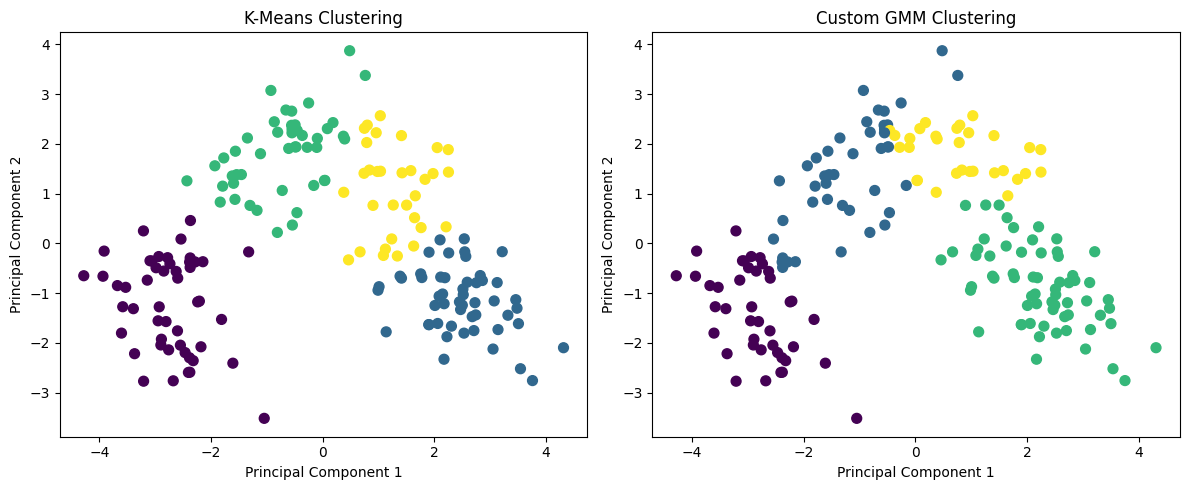

Silhouette Score for K-Means: 0.491641100754632
Silhouette Score for Custom GMM: 0.42316024480121067


In [5]:
#-----------------2.2 K-Means Clustering and GMM on wine dataset----------------
#-----------------Calculating BIC,AIC and Silhouette scores---------------------

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.random.seed(10)

wine = load_wine()
data = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])
X = data.drop('target', axis=1)
y = data['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cluster_range = range(2,179)

bic_scores = []
aic_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0,n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    print(f"Cluster:{n_clusters}\n")
    my_gmm = MyGMM()
    my_gmm.fit(X_scaled, n_components=n_clusters) 
    gmm_labels = np.argmax(my_gmm.calculate_responsibilities(X_scaled), axis=1)
    bic_gmm = my_gmm.calculate_bic(X_scaled)
    aic_gmm = my_gmm.calculate_aic(X_scaled)
    print(n_clusters)
    print("BIC : " , bic_gmm)
    print("AIC : " , aic_gmm)
    bic_scores.append(bic_gmm)
    aic_scores.append(aic_gmm)

best_bic_cluster = cluster_range[np.argmin(bic_scores)]
best_aic_cluster = cluster_range[np.argmin(aic_scores)]
print(f"Optimal number of clusters based on BIC: {best_bic_cluster}")
print(f"Optimal number of clusters based on AIC: {best_aic_cluster}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=4, random_state=0,n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca)
my_gmm = MyGMM()
my_gmm.fit(X_pca, n_components=4)
gmm_labels = np.argmax(my_gmm.calculate_responsibilities(X_pca), axis=1)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title('Custom GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Compute silhouette scores
silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)
silhouette_gmm = silhouette_score(X_pca, gmm_labels)

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Custom GMM: {silhouette_gmm}")